In [ ]:
import numpy as np
import pandas as pd

In [ ]:
l_d5 = pd.read_csv('/content/last_df_mkd(5.11).csv')

In [ ]:
l_d5['id_client'].value_counts()

5159     524
10092    316
4613     278
5357     231
2483     182
        ... 
4296       1
8382       1
12476      1
2235       1
2049       1
Name: id_client, Length: 12735, dtype: int64

In [ ]:
q = pd.read_csv('/content/train_dataset_hackathon_mkb.csv',sep=';',encoding='cp1251')

In [ ]:
q['TARGET']

0        0
1        0
2        0
3        0
4        0
        ..
17886    0
17887    0
17888    0
17889    1
17890    0
Name: TARGET, Length: 17891, dtype: int64

In [ ]:
train_df = l_d5[:17891]

In [ ]:
train_df['TARGET'] = q['TARGET']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train_df[train_df['id_client']==4613][['new_SIGN_DATE_year','TARGET']].sort_values(by='TARGET')

,new_SIGN_DATE_year,TARGET
2795,2018,1
9159,2018,1
9253,2018,1
9254,2018,1
9255,2018,1
...,...,...
6793,2018,1
6792,2018,1
6770,2018,1
6865,2018,1


In [ ]:
all_df = l_d5
test_df = all_df.iloc[17891:,:]

In [ ]:
train_df = train_df.drop(['TARGET'],axis=1)

In [ ]:
obj_df_tr = train_df.loc[:,['id_client','IP_flag','EGRPOINCLUDED','OKFS_GROUP','OKOPF_GROUP','OKOGU_GROUP','OKATO_REGIONCODE','OKATO_FED','OKTMO_CODE_fixed','OKTMO_FED','WORKERSRANGE','OKVED_CODE_fixed','FLAG_DISQUALIFICATION','SEX_NAME','CITIZENSHIP_NAME','TELEPHONECOUNT_fixed','MANAGERCOUNTINCOUNTRY_fixed','MANAGERCOUNTINREGION_fixed','MANAGERINNCOUNT_fixed']]

In [ ]:
obj_df_tr = obj_df_tr.astype('category')

In [ ]:
konh = pd.read_csv('/content/konh.csv')

In [ ]:
id_tr = konh.id_client.array

In [ ]:
new_obj_df_tr = pd.DataFrame(columns=obj_df_tr.columns)

In [ ]:
for x in id_tr:
    new_obj_df_tr = new_obj_df_tr.append(obj_df_tr[obj_df_tr.id_client==x][0:1])


In [ ]:
id_te

NameError: ignored

In [ ]:
labels_tune = konh['TARGET']

In [ ]:
obj_df_te = test_df.loc[:,['id_client','IP_flag','EGRPOINCLUDED','OKFS_GROUP','OKOPF_GROUP','OKOGU_GROUP','OKATO_REGIONCODE','OKATO_FED','OKTMO_CODE_fixed','OKTMO_FED','WORKERSRANGE','OKVED_CODE_fixed','FLAG_DISQUALIFICATION','SEX_NAME','CITIZENSHIP_NAME','TELEPHONECOUNT_fixed','MANAGERCOUNTINCOUNTRY_fixed','MANAGERCOUNTINREGION_fixed','MANAGERINNCOUNT_fixed']]

In [ ]:
obj_df_te = obj_df_te.astype('category')

In [ ]:
konh_test = all_df.iloc[17891:,:]

In [ ]:
konh_test = konh_test.groupby('id_client').aggregate('mean').reset_index()

In [ ]:
konh_test.F1160.value_counts()

2.150000e+05    1
8.009000e+06    1
3.687500e+07    1
8.710000e+05    1
3.025000e+06    1
1.262300e+07    1
6.620900e+07    1
1.266000e+06    1
1.184000e+06    1
3.908000e+06    1
1.331000e+06    1
2.155800e+07    1
1.900000e+04    1
7.746000e+06    1
5.930000e+05    1
1.150000e+06    1
5.451000e+06    1
1.133000e+06    1
8.940000e+05    1
4.000000e+04    1
1.037000e+07    1
1.259800e+07    1
3.832400e+07    1
3.690000e+05    1
7.280000e+06    1
3.312000e+06    1
9.790400e+07    1
1.318000e+06    1
9.172000e+06    1
1.693980e+08    1
6.552000e+06    1
1.300000e+05    1
1.330000e+05    1
1.309400e+07    1
2.230000e+05    1
1.390000e+05    1
5.692000e+06    1
1.015570e+08    1
2.977000e+06    1
2.820000e+05    1
2.649000e+06    1
6.000000e+03    1
2.056000e+06    1
2.351000e+06    1
8.238000e+06    1
7.189000e+06    1
2.337998e+09    1
3.823000e+06    1
3.031100e+07    1
3.592000e+06    1
4.436000e+07    1
6.030000e+05    1
9.507000e+06    1
4.178000e+06    1
3.998000e+06    1
Name: F116

In [ ]:
konh_test.describe()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


,id_client,Unnamed: 0,id_contract,IP_flag,F1100,F1110,F1150,F1160,F1170,F1180,F1190,F1200,F1210,F1220,F1230,F1240,F1250,F1260,F1300,F1310,F1320,F1350,F1360,F1370,F1400,F1410,F1420,F1450,F1500,F1510,F1520,F1530,F1550,F1600,F1700,F2100,F2110,F2120,F2200,F2210,...,new3,new4,new5,new6,new7,new8,new9,new10,new11,new12,new13,new14,new15,new16,new17,new18,new19,new20,new21,new22,new23,new24,new25,new26,new27,new28,new_F1150,new_F1230,new_F1410,new_F1510,new_F1520,new_F2110,new_F2120,new_F2200,new_F2210,new_F2220,new_F2300,new_F2320,new_F2330,new_F2400
count,4761.000000,4761.000000,4761.000000,4761.000000,1.797000e+03,2.720000e+02,1.697000e+03,5.500000e+01,3.100000e+02,3.940000e+02,2.810000e+02,3.145000e+03,2.610000e+03,6.880000e+02,2.987000e+03,5.740000e+02,3.070000e+03,8.980000e+02,3.149000e+03,1.808000e+03,8.000000e+00,2.080000e+02,2.510000e+02,1.772000e+03,9.840000e+02,6.480000e+02,3.850000e+02,1.860000e+02,3.043000e+03,1.361000e+03,3.012000e+03,1.400000e+02,1.780000e+02,3.155000e+03,3.155000e+03,1.800000e+03,3.038000e+03,2.956000e+03,3.058000e+03,1.041000e+03,...,9.150000e+02,382.00,636.0,683.000000,935.000000,906.000000,6.330000e+02,1245.000000,1219.000000,9.900000e+02,1581.00000,1578.000000,1.477000e+03,1668.000000,1666.000000,1.587000e+03,931.000000,569.0,852.000000,777.0,776.000000,1583.000000,1057.0,1542.000000,1519.000000,1518.000000,1.424000e+03,2.528000e+03,4.330000e+02,9.310000e+02,2.543000e+03,2.549000e+03,2.481000e+03,2.579000e+03,8.510000e+02,5.400000e+02,2.591000e+03,4.500000e+02,6.130000e+02,2.589000e+03
mean,6411.463558,21652.221380,21653.221380,0.223698,1.224593e+09,8.137971e+07,8.142487e+08,5.665060e+07,1.518055e+09,8.620192e+07,1.997197e+08,4.576624e+08,8.730769e+07,1.774919e+07,2.640738e+08,2.706665e+08,8.184210e+07,8.516107e+06,3.991255e+08,1.376205e+08,-4.263112e+07,2.008668e+09,2.955346e+07,2.070916e+08,1.128145e+09,1.371119e+09,1.506384e+08,2.547871e+08,4.195796e+08,2.152774e+08,2.574578e+08,5.660440e+08,6.697251e+07,1.153679e+09,1.154907e+09,4.496936e+08,1.134184e+09,8.875267e+08,7.621482e+07,6.191760e+08,...,9.715129e+05,inf,inf,inf,inf,0.591401,3.705726e+06,inf,0.603054,2.146871e+06,inf,0.565405,2.059353e+06,inf,0.558123,1.542546e+06,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,1.175081e+08,5.383647e+07,5.109119e+08,3.509206e+07,2.095928e+07,1.289572e+08,1.148098e+08,6.015796e+06,2.083355e+08,1.830132e+07,-2.528290e+07,9.130282e+06,6.455460e+06,-2.607749e+07
std,3656.888423,2123.465805,2123.465805,0.416150,1.954608e+10,8.351265e+08,1.022968e+10,3.147659e+08,1.683036e+10,4.057336e+08,1.314710e+09,4.994833e+09,6.426732e+08,1.937430e+08,3.230437e+09,2.283911e+09,1.428569e+09,5.692985e+07,6.066536e+09,1.849906e+09,1.025508e+08,1.208077e+10,1.468697e+08,3.249858e+09,1.846171e+10,1.775634e+10,1.144549e+09,9.112902e+08,4.748172e+09,2.532616e+09,2.342308e+09,4.179752e+09,4.316533e+08,1.837766e+10,1.837797e+10,5.136588e+09,9.801854e+09,7.140327e+09,1.905805e+09,6.329772e+09,...,1.067505e+07,NaN,NaN,NaN,NaN,0.356126,4.121337e+07,NaN,0.332699,8.167606e+06,NaN,0.301812,9.523033e+06,NaN,0.272549,5.863587e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.251187e+09,1.993574e+09,8.568284e+09,2.331736e+09,5.581078e+08,1.026287e+09,1.122583e+09,3.726482e+08,5.633240e+09,1.682358e+08,2.474948e+09,2.218286e+08,2.378461e+08,2.426928e+09
min,4.000000,17892.000000,17893.000000,0.000000,4.740000e+02,1.000000e+03,4.740000e+02,6.000000e+03,1.000000e+03,-1.830000e+05,1.000000e+03,-1.000000e+04,1.000000e+03,2.000000e+01,-7.919000e+06,1.000000e+03,-9.810000e+05,-2.200000e+05,-6.288671e+09,1.000000e+01,-2.956510e+08,-3.417000e+06,-5.030000e+05,-2.015361e+10,-2.750000e+06,-2.750000e+06,-9.700000e+04,-7.120000e+05,-6.193000e+06,-2.500000e+07,-1.903000e+06,-5.240000e+05,1.000000e+03,-1.000000e+04,-1.000000e+04,-2.212800e+10,7.000000e+03,-3.413530e+09,-2.305835e+10,-6.683200e+07,...,0.000000e+00,1.00,1.0,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,1.000000,1.

In [ ]:
konh.describe()

,Unnamed: 0,id_client,id_contract,IP_flag,F1100,F1110,F1150,F1160,F1170,F1180,F1190,F1200,F1210,F1220,F1230,F1240,F1250,F1260,F1300,F1310,F1320,F1350,F1360,F1370,F1400,F1410,F1420,F1450,F1500,F1510,F1520,F1530,F1550,F1600,F1700,F2100,F2110,F2120,F2200,F2210,...,new4,new5,new6,new7,new8,new9,new10,new11,new12,new13,new14,new15,new16,new17,new18,new19,new20,new21,new22,new23,new24,new25,new26,new27,new28,new_F1150,new_F1230,new_F1410,new_F1510,new_F1520,new_F2110,new_F2120,new_F2200,new_F2210,new_F2220,new_F2300,new_F2320,new_F2330,new_F2400,TARGET
count,8922.000000,8922.000000,8922.000000,8922.000000,3.813000e+03,5.390000e+02,3.618000e+03,1.240000e+02,7.180000e+02,1.029000e+03,6.870000e+02,6.238000e+03,5.255000e+03,1.483000e+03,6.002000e+03,1.243000e+03,6.101000e+03,1.975000e+03,6.240000e+03,3.778000e+03,3.600000e+01,5.560000e+02,6.410000e+02,3.749000e+03,2.127000e+03,1.312000e+03,9.900000e+02,3.780000e+02,6.083000e+03,2.587000e+03,6.016000e+03,4.560000e+02,4.760000e+02,6.255000e+03,6.254000e+03,3.804000e+03,6.104000e+03,5.933000e+03,6.117000e+03,1.842000e+03,...,828.000000,1315.000000,1492.000000,2253.000000,2204.000000,1.823000e+03,2791.000000,2737.000000,2.336000e+03,3608.000000,3599.000000,3.402000e+03,3753.000000,3749.000000,3.589000e+03,2253.000000,1255.000000,2075.000000,1974.000000,1972.000000,3611.000000,2218.000000,3533.000000,3464.000000,3461.000000,3.144000e+03,5.230000e+03,8.220000e+02,1.770000e+03,5.231000e+03,5.287000e+03,5.116000e+03,5.303000e+03,1.536000e+03,1.208000e+03,5.324000e+03,1.030000e+03,1.241000e+03,5.328000e+03,8922.000000
mean,4460.500000,6367.712845,8927.420745,0.183577,1.500905e+09,6.935237e+07,1.060895e+09,6.227641e+07,1.455451e+09,8.564511e+07,7.738869e+08,4.514681e+08,8.781025e+07,1.437572e+07,2.746508e+08,2.235322e+08,5.912421e+07,2.321999e+07,6.457392e+08,4.102052e+08,-4.440332e+07,1.318131e+09,5.973565e+07,2.541220e+08,8.580067e+08,1.110346e+09,1.869001e+08,3.580622e+08,4.414704e+08,2.593900e+08,3.033594e+08,1.524438e+08,7.371261e+07,1.364650e+09,1.365276e+09,4.936527e+08,1.347639e+09,1.068106e+09,8.740586e+07,6.287075e+08,...,inf,inf,inf,inf,0.628502,2.003402e+06,inf,0.625971,1.945206e+06,inf,0.612714,1.809537e+06,inf,0.606056,1.759142e+06,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,5.279166e+07,1.709445e+07,9.222022e+07,3.161784e+07,1.690577e+07,1.343356e+08,1.112911e+08,5.207869e+06,5.993611e+07,1.559127e+07,2.901361e+06,-8.492533e+05,-4.948053e+06,-3.212004e+05,0.209786
std,2575.703884,3680.554333,4881.111898,0.385001,2.494452e+10,6.422873e+08,1.698762e+10,2.631264e+08,1.343161e+10,5.648259e+08,1.127785e+10,3.965542e+09,9.081734e+08,1.297399e+08,2.495538e+09,1.856772e+09,7.509933e+08,4.124585e+08,1.472846e+10,1.111992e+10,1.491933e+08,7.990794e+09,7.846531e+08,4.443357e+09,1.238759e+10,1.339969e+10,2.008815e+09,1.761483e+09,4.088649e+09,2.657827e+09,2.543953e+09,5.972178e+08,8.306361e+08,2.283372e+10,2.283563e+10,5.705677e+09,1.087690e+10,7.715642e+09,1.851821e+09,6.120271e+09,...,NaN,NaN,NaN,NaN,0.350524,1.290116e+07,NaN,0.326155,8.084966e+06,NaN,0.300722,1.153111e+07,NaN,0.275773,1.360440e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.286358e+09,3.551110e+08,1.854702e+09,1.015829e+09,4.007758e+08,1.144258e+09,8.639862e+08,6.034318e+08,8.888367e+08,1.075308e+08,1.206665e+09,1.053921e+08,1.904253e+08,1.133635e+09,0.402818
min,0.000000,1.000000,2.000000,0.000000,-1.820000e+05,1.000000e+03,1.000000e+03,-1.175000e+06,1.000000e+03,-2.540000e+05,1.000000e+03,-2.950000e+05,-2.100000e+05,-3.990000e+05,1.000000e+03,-5.200000e+04,-2.103100e+07,-3.701000e+06,-7.865320e+10,1.000000e+03,-8.538600e+08,-2.273630e+08,1.000000e+03,-7.865321e+10,-4.140000e+06,-4.140000e+06,-7.150000e+05,-2.427000e+06,-3.519000e+06,-1.998900e+07,-1.022000e+06,-5.240000e+05,-8.498100e+07,-2.950000e+05,-2.950000e+05,-6.795270e+09,3.000000e+03,-1.110870e+08,-6.858694e+09,1.000000e+03,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0000

In [ ]:
giper_konh = pd.concat([konh,konh_test])

In [ ]:
giper_konh

,Unnamed: 0,id_client,id_contract,IP_flag,F1100,F1110,F1150,F1160,F1170,F1180,F1190,F1200,F1210,F1220,F1230,F1240,F1250,F1260,F1300,F1310,F1320,F1350,F1360,F1370,F1400,F1410,F1420,F1450,F1500,F1510,F1520,F1530,F1550,F1600,F1700,F2100,F2110,F2120,F2200,F2210,...,new4,new5,new6,new7,new8,new9,new10,new11,new12,new13,new14,new15,new16,new17,new18,new19,new20,new21,new22,new23,new24,new25,new26,new27,new28,new_F1150,new_F1230,new_F1410,new_F1510,new_F1520,new_F2110,new_F2120,new_F2200,new_F2210,new_F2220,new_F2300,new_F2320,new_F2330,new_F2400,TARGET
0,0.0,1,5166.0,0.0,10000.0,NaN,10000.0,NaN,NaN,NaN,NaN,7035000.0,NaN,NaN,NaN,NaN,7035000.0,NaN,6121000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,924000.0,NaN,924000.0,NaN,NaN,7045000.0,7045000.0,NaN,32078000.0,27921000.0,4157000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.125000,0.550000,2.226551e+06,0.041322,0.458678,1.159381e+06,NaN,NaN,NaN,NaN,NaN,6.050000,2.0,5.045455,9.000000,4.686366,0.0,NaN,NaN,NaN,38000.0,5472000.0,4554000.0,918000.0,NaN,NaN,918000.0,NaN,NaN,918000.0,1.0
1,1.0,2,2389.0,0.0,14626000.0,NaN,14414000.0,NaN,212000.0,NaN,NaN,14939000.0,8521000.0,NaN,6395000.0,NaN,23000.0,NaN,18901000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10664000.0,8995000.0,1669000.0,NaN,NaN,29565000.0,29565000.0,NaN,28874000.0,26330000.0,2544000.0,NaN,...,NaN,1.0,inf,NaN,NaN,NaN,NaN,NaN,NaN,0.047619,0.619048,3.181044e+06,0.022727,0.465909,4.343591e+06,NaN,NaN,NaN,NaN,NaN,4.190476,2.0,3.153846,3.153846,4.306454,-1180000.0,6213000.0,NaN,8525000.0,19000.0,17403000.0,16235000.0,1168000.0,NaN,NaN,1368000.0,NaN,-200000.0,1095000.0,0.0
2,2.0,3,17329.0,0.0,3745000.0,NaN,3745000.0,NaN,NaN,NaN,NaN,9131000.0,888000.0,67000.0,6261000.0,NaN,645000.0,1270000.0,40000.0,40000.0,NaN,NaN,NaN,NaN,10113000.0,10113000.0,NaN,NaN,2723000.0,NaN,2723000.0,NaN,NaN,12876000.0,12876000.0,120000.0,378000.0,258000.0,73000.0,2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,1005000.0,-2225000.0,-2391000.0,NaN,2440000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,3.0,5,15086.0,0.0,87239000.0,NaN,86087000.0,NaN,NaN,262000.0,890000.0,75181000.0,23412000.0,NaN,29428000.0,10200000.0,12141000.0,NaN,134209000.0,10518000.0,NaN,NaN,NaN,104475000.0,NaN,NaN,NaN,NaN,28211000.0,NaN,28111000.0,NaN,100000.0,162420000.0,162420000.0,104340000.0,871384000.0,767044000.0,40236000.0,64104000.0,...,2.0,6.0,10.0,0.0,1.0,338369.0,0.0,0.863636,233622.058824,0.003247,0.938312,1.948469e+05,0.001608,0.919614,2.401059e+05,22.0,NaN,19.0,17.0,11.737408,6.058442,3.0,5.937716,5.023102,6.189865,9112000.0,2017000.0,NaN,NaN,-1121000.0,23631000.0,-7613000.0,24452000.0,6792000.0,NaN,23302000.0,256000.0,NaN,19022000.0,0.0
4,4.0,7,933.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,inf,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4756,20930.0,12725,20931.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135000.0,NaN,3000.0,79000.0,NaN,28000.0,25000.0,17000.0,30000.0,NaN,NaN,NaN,-13000.0,NaN,NaN,NaN,NaN,118000.0,NaN,118000.0,NaN,NaN,135000.0,135000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4757,21786.0,12726,21787.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
konh = konh.drop(['TARGET'],axis=1)
konh_test = konh_test.drop(['OKTMO_CODE'],axis=1)

In [ ]:
id_te = konh_test.id_client.array

In [ ]:
new_obj_df_te = pd.DataFrame(columns=obj_df_te.columns)

In [ ]:
for x in id_te:
    new_obj_df_te = new_obj_df_te.append(obj_df_te[obj_df_te.id_client==x][0:1])


In [ ]:
new_obj_df_te

,id_client,IP_flag,EGRPOINCLUDED,OKFS_GROUP,OKOPF_GROUP,OKOGU_GROUP,OKATO_REGIONCODE,OKATO_FED,OKTMO_CODE_fixed,OKTMO_FED,WORKERSRANGE,OKVED_CODE_fixed,FLAG_DISQUALIFICATION,SEX_NAME,CITIZENSHIP_NAME,TELEPHONECOUNT_fixed,MANAGERCOUNTINCOUNTRY_fixed,MANAGERCOUNTINREGION_fixed,MANAGERINNCOUNT_fixed
19083,4,0,1.0,Частная собственность,Коммерческая корпоративная организация,Группировки хозяйствующих субъектов и обществе...,79.0,40.0,79701000001.0,40.0,51 .. 100,18.12,NaN,NaN,NaN,1.0,3.0,1.0,1.0
24954,6,0,1.0,Государственная собственность,Некоммерческая унитарная организация,Государственная власть в субъектах РФ,79.0,40.0,79701000001.0,40.0,16 .. 50,71.20.61,NaN,NaN,NaN,2.0,2.0,1.0,1.0
21716,8,0,1.0,Государственная собственность,Коммерческая унитарная организация,Государственная власть в субъектах РФ,79.0,40.0,79701000001.0,40.0,51 .. 100,46.46.1,NaN,NaN,NaN,1.0,1.0,1.0,1.0
19202,18,0,1.0,Частная собственность,Коммерческая корпоративная организация,Группировки хозяйствующих субъектов и обществе...,79.0,40.0,79701000001.0,40.0,0 .. 5,46.46,NaN,NaN,NaN,1.0,1.0,1.0,1.0
18779,19,0,1.0,Частная собственность,Коммерческая корпоративная организация,Группировки хозяйствующих субъектов и обществе...,79.0,40.0,79701000001.0,40.0,6 .. 10,47.21,NaN,NaN,NaN,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20930,12725,0,0.0,Частная собственность,Коммерческая корпоративная организация,Группировки хозяйствующих субъектов и обществе...,45.0,30.0,45323000000.0,30.0,0 .. 5,46.73,NaN,NaN,NaN,1.0,1.0,1.0,1.0
21786,12726,0,0.0,Частная собственность,Коммерческая корпоративная организация,Группировки хозяйствующих субъектов и обществе...,45.0,30.0,45327000000.0,30.0,0 .. 5,45.31,NaN,NaN,NaN,RARE_VALUE,1.0,1.0,1.0
20030,12728,0,0.0,Частная собственность,Коммерческая корпоративная организация,Группировки хозяйствующих субъектов и обществе...,45.0,30.0,45329000000.0,30.0,0 .. 5,41.20,NaN,NaN,NaN,0.0,4.0,3.0,3.0
23912,12729,0,0.0,Частная собственность,Коммерческая корпоративная организация,Группировки хозяйствующих субъектов и обществе...,45.0,30.0,45321000000.0,30.0,101 .. 150,46.46,NaN,NaN,NaN,RARE_VALUE,1.0,1.0,1.0


,id_client,id_contract,IP_flag,F1100,F1110,F1150,F1160,F1170,F1180,F1190,F1200,F1210,F1220,F1230,F1240,F1250,F1260,F1300,F1310,F1320,F1350,F1360,F1370,F1400,F1410,F1420,F1450,F1500,F1510,F1520,F1530,F1550,F1600,F1700,F2100,F2110,F2120,F2200,F2210,F2220,...,new3,new4,new5,new6,new7,new8,new9,new10,new11,new12,new13,new14,new15,new16,new17,new18,new19,new20,new21,new22,new23,new24,new25,new26,new27,new28,new_F1150,new_F1230,new_F1410,new_F1510,new_F1520,new_F2110,new_F2120,new_F2200,new_F2210,new_F2220,new_F2300,new_F2320,new_F2330,new_F2400
0,4,19084.0,0.0,2177000.0,NaN,2177000.0,NaN,NaN,NaN,NaN,6506000.0,2598000.0,NaN,1722000.0,NaN,2186000.0,NaN,6956000.0,10000.0,NaN,NaN,NaN,6946000.0,NaN,NaN,NaN,NaN,1727000.0,292000.0,1435000.0,NaN,NaN,8683000.0,8683000.0,-1145000.0,33927000.0,35072000.0,-1145000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1331000.0,-35000.0,NaN,-668000.0,-233000.0,-1906000.0,-149000.0,-1757000.0,NaN,NaN,-2144000.0,NaN,NaN,-2093000.0
1,6,24955.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,inf,0.0,1.0,1999602.0,0.0,1.0,1375253.2,0.000000,1.000000,129109.043478,0.000000,1.000000,145328.395122,2.0,NaN,2.0,1.666667,1.146272,4.456522,NaN,4.456522,4.456522,5.016373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,21717.0,0.0,3410000.0,NaN,2984000.0,NaN,NaN,NaN,426000.0,55010000.0,17909000.0,39000.0,21333000.0,NaN,15729000.0,NaN,15140000.0,500000.0,NaN,1542000.0,NaN,13098000.0,NaN,NaN,NaN,NaN,43280000.0,NaN,43280000.0,NaN,NaN,58420000.0,58420000.0,45028000.0,393065000.0,348037000.0,6894000.0,38134000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-436000.0,4862000.0,NaN,NaN,12624000.0,-85953000.0,-88777000.0,69000.0,2755000.0,NaN,436000.0,NaN,NaN,38000.0
3,18,19618.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7102000.0,3351000.0,NaN,1925000.0,NaN,1826000.0,NaN,3203000.0,10000.0,NaN,NaN,NaN,3193000.0,2925000.0,2925000.0,NaN,NaN,974000.0,NaN,974000.0,NaN,NaN,7102000.0,7102000.0,905000.0,10093000.0,9188000.0,905000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030612,0.469388,220082.244444,0.031826,0.438861,178142.488095,NaN,NaN,NaN,NaN,NaN,6.091837,6.333333,5.695652,5.600000,4.532842,NaN,409000.0,-704000.0,NaN,662000.0,-1467000.0,-956000.0,-511000.0,NaN,NaN,-511000.0,NaN,NaN,NaN
4,19,18780.0,0.0,6276000.0,NaN,6276000.0,NaN,NaN,NaN,NaN,3651000.0,114000.0,NaN,1907000.0,NaN,1630000.0,NaN,2546000.0,10000.0,NaN,NaN,NaN,2536000.0,266000.0,266000.0,NaN,NaN,7115000.0,NaN,7115000.0,NaN,NaN,9927000.0,9927000.0,6470000.0,84375000.0,77905000.0,3117000.0,3353000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3894000.0,-5214000.0,-675000.0,NaN,-715000.0,21807000.0,19272000.0,685000.0,1850000.0,NaN,-160000.0,1000.0,NaN,-185000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4756,12725,20931.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135000.0,NaN,3000.0,79000.0,NaN,28000.0,25000.0,17000.0,30000.0,NaN,NaN,NaN,-13000.0,NaN,NaN,NaN,NaN,118000.0,NaN,118000.0,NaN,NaN,135000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4757,12726,21787.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
last_train = pd.merge(konh, new_obj_df_tr, on='id_client', how='outer')

In [ ]:
last_test = pd.merge(konh_test, new_obj_df_te, on='id_client', how='outer')

In [ ]:
all_tune_df = pd.concat([last_train,last_test]).reset_index().drop(['index'],axis=1)

In [ ]:
all_tune_df#8922

,Unnamed: 0,id_client,id_contract,IP_flag_x,F1100,F1110,F1150,F1160,F1170,F1180,F1190,F1200,F1210,F1220,F1230,F1240,F1250,F1260,F1300,F1310,F1320,F1350,F1360,F1370,F1400,F1410,F1420,F1450,F1500,F1510,F1520,F1530,F1550,F1600,F1700,F2100,F2110,F2120,F2200,F2210,...,new21,new22,new23,new24,new25,new26,new27,new28,new_F1150,new_F1230,new_F1410,new_F1510,new_F1520,new_F2110,new_F2120,new_F2200,new_F2210,new_F2220,new_F2300,new_F2320,new_F2330,new_F2400,IP_flag_y,EGRPOINCLUDED_y,OKFS_GROUP,OKOPF_GROUP,OKOGU_GROUP,OKATO_REGIONCODE_y,OKATO_FED_y,OKTMO_CODE_fixed,OKTMO_FED_y,WORKERSRANGE,OKVED_CODE_fixed,FLAG_DISQUALIFICATION_y,SEX_NAME,CITIZENSHIP_NAME,TELEPHONECOUNT_fixed,MANAGERCOUNTINCOUNTRY_fixed,MANAGERCOUNTINREGION_fixed,MANAGERINNCOUNT_fixed
0,0.0,1,5166.0,0.0,10000.0,NaN,10000.0,NaN,NaN,NaN,NaN,7035000.0,NaN,NaN,NaN,NaN,7035000.0,NaN,6121000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,924000.0,NaN,924000.0,NaN,NaN,7045000.0,7045000.0,NaN,32078000.0,27921000.0,4157000.0,NaN,...,NaN,NaN,NaN,6.050000,2.0,5.045455,9.000000,4.686366,0.0,NaN,NaN,NaN,38000.0,5472000.0,4554000.0,918000.0,NaN,NaN,918000.0,NaN,NaN,918000.0,0,1.0,Частная собственность,Коммерческая корпоративная организация,Группировки хозяйствующих субъектов и обществе...,79.0,40.0,RARE_VALUE,40.0,6 .. 10,43.11,NaN,NaN,NaN,1.0,1.0,1.0,1.0
1,1.0,2,2389.0,0.0,14626000.0,NaN,14414000.0,NaN,212000.0,NaN,NaN,14939000.0,8521000.0,NaN,6395000.0,NaN,23000.0,NaN,18901000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10664000.0,8995000.0,1669000.0,NaN,NaN,29565000.0,29565000.0,NaN,28874000.0,26330000.0,2544000.0,NaN,...,NaN,NaN,NaN,4.190476,2.0,3.153846,3.153846,4.306454,-1180000.0,6213000.0,NaN,8525000.0,19000.0,17403000.0,16235000.0,1168000.0,NaN,NaN,1368000.0,NaN,-200000.0,1095000.0,0,1.0,Частная собственность,Коммерческая корпоративная организация,Группировки хозяйствующих субъектов и обществе...,79.0,40.0,RARE_VALUE,40.0,6 .. 10,31.09,NaN,NaN,NaN,2.0,1.0,1.0,1.0
2,2.0,3,17329.0,0.0,3745000.0,NaN,3745000.0,NaN,NaN,NaN,NaN,9131000.0,888000.0,67000.0,6261000.0,NaN,645000.0,1270000.0,40000.0,40000.0,NaN,NaN,NaN,NaN,10113000.0,10113000.0,NaN,NaN,2723000.0,NaN,2723000.0,NaN,NaN,12876000.0,12876000.0,120000.0,378000.0,258000.0,73000.0,2000.0,...,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,1005000.0,-2225000.0,-2391000.0,NaN,2440000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Частная собственность,Коммерческая корпоративная организация,Группировки хозяйствующих субъектов и обществе...,79.0,40.0,RARE_VALUE,40.0,0 .. 5,10.11,NaN,NaN,NaN,2.0,1.0,1.0,1.0
3,3.0,5,15086.0,0.0,87239000.0,NaN,86087000.0,NaN,NaN,262000.0,890000.0,75181000.0,23412000.0,NaN,29428000.0,10200000.0,12141000.0,NaN,134209000.0,10518000.0,NaN,NaN,NaN,104475000.0,NaN,NaN,NaN,NaN,28211000.0,NaN,28111000.0,NaN,100000.0,162420000.0,162420000.0,104340000.0,871384000.0,767044000.0,40236000.0,64104000.0,...,19.0,17.0,11.737408,6.058442,3.0,5.937716,5.023102,6.189865,9112000.0,2017000.0,NaN,NaN,-1121000.0,23631000.0,-7613000.0,24452000.0,6792000.0,NaN,23302000.0,256000.0,NaN,19022000.0,0,1.0,Частная собственность,Коммерческая корпоративная организация,Группировки хозяйствующих субъектов и обществе...,79.0,40.0,79701000001.0,40.0,251 .. 500,10.51,NaN,NaN,NaN,2.0,1.0,1.0,1.0
4,4.0,7,933.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,79.0,40.0,79701000001.0,40.0,NaN,47.52.7,NaN,мужской,Российская Федерация,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13678,20930.0,12725,20931.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135000.0,NaN,3000.0,79000.0,NaN,28000

In [ ]:
all_tune_df = all_tune_df.drop(['FLAG_DISQUALIFICATION_x','EGRPOINCLUDED_x','OKATO_REGIONCODE_x','OKATO_FED_x','OKTMO_FED_x'],axis=1)

In [ ]:
sorted(list(all_tune_df.new4.unique()))[-2]
l = [4,5,6,7,10,13,16,19,20,21,22,23,24,25,26,27,28]
def min_inf(x):
    if x==np.inf:
        return m**3
    return x
for x in l:
    m = sorted(list(all_tune_df['new'+str(x)].unique()))[-2]
    all_tune_df['new'+str(x)] = all_tune_df['new'+str(x)].apply(min_inf)


In [ ]:
new = 'new_F1150	new_F1230	new_F1410	new_F1510	new_F1520	new_F2110	new_F2120	new_F2200	new_F2210	new_F2220	new_F2300	new_F2320	new_F2330'
new = new.split()
new = new + ['new0','new1','new2','new3','new9','new12','new15','new18']

In [ ]:
for x in new:
    m = sorted(list(all_tune_df[x].unique()))[-2]
    all_tune_df[x] = all_tune_df[x].apply(min_inf)

In [ ]:
all_tune_df.describe()

,Unnamed: 0,id_contract,IP_flag_x,F1100,F1110,F1150,F1160,F1170,F1180,F1190,F1200,F1210,F1220,F1230,F1240,F1250,F1260,F1300,F1310,F1320,F1350,F1360,F1370,F1400,F1410,F1420,F1450,F1500,F1510,F1520,F1530,F1550,F1600,F1700,F2100,F2110,F2120,F2200,F2210,F2220,...,new4,new5,new6,new7,new8,new9,new10,new11,new12,new13,new14,new15,new16,new17,new18,new19,new20,new21,new22,new23,new24,new25,new26,new27,new28,new_F1150,new_F1230,new_F1410,new_F1510,new_F1520,new_F2110,new_F2120,new_F2200,new_F2210,new_F2220,new_F2300,new_F2320,new_F2330,new_F2400,OKATO_REGIONCODE_y
count,13683.000000,13683.000000,13683.000000,5.610000e+03,8.110000e+02,5.315000e+03,1.790000e+02,1.028000e+03,1.423000e+03,9.680000e+02,9.383000e+03,7.865000e+03,2.171000e+03,8.989000e+03,1.817000e+03,9.171000e+03,2.873000e+03,9.389000e+03,5.586000e+03,4.400000e+01,7.640000e+02,8.920000e+02,5.521000e+03,3.111000e+03,1.960000e+03,1.375000e+03,5.640000e+02,9.126000e+03,3.948000e+03,9.028000e+03,5.960000e+02,6.540000e+02,9.410000e+03,9.409000e+03,5.604000e+03,9.142000e+03,8.889000e+03,9.175000e+03,2.883000e+03,2.323000e+03,...,1210.000000,1.951000e+03,2.175000e+03,3188.000000,3110.000000,2.456000e+03,4036.000000,3956.000000,3.326000e+03,5189.000000,5177.000000,4.879000e+03,5421.000000,5415.000000,5.176000e+03,3.184000e+03,1824.000000,2.927000e+03,2751.000000,2.748000e+03,5.194000e+03,3.275000e+03,5.075000e+03,4.983000e+03,4.979000e+03,4.568000e+03,7.758000e+03,1.255000e+03,2.701000e+03,7.774000e+03,7.836000e+03,7.597000e+03,7.882000e+03,2.387000e+03,1.748000e+03,7.915000e+03,1.480000e+03,1.854000e+03,7.917000e+03,12976.000000
mean,10442.359643,13355.363216,0.197537,1.412396e+09,7.338620e+07,9.821448e+08,6.054781e+07,1.474330e+09,8.579928e+07,6.072123e+08,4.535443e+08,8.764348e+07,1.544479e+07,2.711361e+08,2.384222e+08,6.672904e+07,1.862406e+07,5.630268e+08,3.219787e+08,-4.408110e+07,1.506131e+09,5.124268e+07,2.390273e+08,9.434506e+08,1.196561e+09,1.767468e+08,3.240034e+08,4.341711e+08,2.441830e+08,2.880453e+08,2.495982e+08,7.187815e+07,1.293915e+09,1.294736e+09,4.795331e+08,1.276705e+09,1.008055e+09,8.367592e+07,6.252659e+08,1.283470e+08,...,101207.405215,4.904108e+05,5.473857e+05,3.318361,0.617694,2.442152e+06,3.762201,0.618910,2.005232e+06,2.362116,0.598294,1.885163e+06,3.088089,0.591309,1.692732e+06,3.678381e+04,269577.651503,2.837153e+05,44782.804015,8.507345e+08,5.132507e+07,8.751637e+05,1.775508e+07,3.764336e+06,1.152389e+12,7.296597e+07,2.906710e+07,2.366772e+08,3.281536e+07,1.823174e+07,1.325861e+08,1.124402e+08,5.472223e+06,1.128426e+08,1.642847e+07,-6.324845e+06,2.185065e+06,-1.177636e+06,-8.743966e+06,46.353961
std,8541.378328,7338.153942,0.396563,2.335014e+10,7.123029e+08,1.516030e+10,2.791174e+08,1.453201e+10,5.254806e+08,9.528816e+09,4.337571e+09,8.294997e+08,1.529111e+08,2.761346e+09,2.001061e+09,1.028739e+09,3.434938e+08,1.251072e+10,9.205797e+09,1.408190e+08,9.280902e+09,6.696838e+08,4.098107e+09,1.458239e+10,1.497680e+10,1.808590e+09,1.533942e+09,4.319518e+09,2.615102e+09,2.478468e+09,2.094002e+09,7.432335e+08,2.144236e+10,2.144365e+10,5.528855e+09,1.053177e+10,7.529282e+09,1.869891e+09,6.195642e+09,1.145533e+09,...,110357.066437,9.422717e+05,1.207317e+06,19.653612,0.352511,2.369265e+07,25.346702,0.328314,8.108947e+06,48.036628,0.301812,1.096174e+07,91.245893,0.275649,1.178427e+07,2.336703e+05,388993.512183,9.881023e+05,127067.117388,2.403727e+09,8.957482e+08,1.319264e+06,1.292587e+08,2.578577e+07,7.929684e+12,1.648856e+09,1.174745e+09,5.251975e+09,1.596507e+09,4.581930e+08,1.107200e+09,9.560856e+08,5.388847e+08,3.437756e+09,1.293163e+08,1.727470e+09,1.506244e+08,2.073128e+08,1.670505e+09,25.274766
min,0.000000,2.000000,0.000000,-1.820000e+05,1.000000e+03,4.740000e+02,-1.175000e+06,1.000000e+03,-2.540000e+05,1.000000e+03,-2.950000e+05,-2.100000e+05,-3.990000e+05,-7.919000e+06,-5.200000e+04,-2.103100e+07,-3.701000e+06,-7.865320e+10,1.000000e+01,-8.538600e+08,-2.273630e+08,-5.030000e+05,-7.865321e+10,-4.140000e+06,-4.140000e+06,-7.150000e+05,-2.427000e+06,-6.193

In [ ]:
all_tune_df = all_tune_df.drop(['Unnamed: 0'],axis = 1)

In [ ]:
import scipy.stats as st

In [ ]:
all_tune_df = all_tune_df.drop(['id_contract'],axis=1)

In [ ]:
data = all_tune_df['F1100']

In [ ]:
all_tune_df.columns[120:149]

Index(['new0', 'new1', 'new2', 'new3', 'new4', 'new5', 'new6', 'new7', 'new8',
       'new9', 'new10', 'new11', 'new12', 'new13', 'new14', 'new15', 'new16',
       'new17', 'new18', 'new19', 'new20', 'new21', 'new22', 'new23', 'new24',
       'new25', 'new26', 'new27', 'new28'],
      dtype='object')

In [ ]:
l,r = st.t.interval(alpha=0.995, df=len(data)-sum(np.isnan(data))-1, loc=np.mean(data), scale=np.std(data, ddof=1) / np.sqrt(np.size(data)))

In [ ]:
le_ri = []
def per_fil(x):
    if x<l:
        return l
    if x>r:
        return r
    return x
for x in all_tune_df.columns[149:163]:
    data = all_tune_df[x][(1+(-1)*np.isnan(all_tune_df[x])).apply(np.bool)]
    l,r = st.t.interval(alpha=0.995, df=len(data), loc=np.mean(data), scale=np.std(data, ddof=1) / np.sqrt(np.size(data)))
    le_ri.append(l)
    le_ri.append(r)
    all_tune_df[x] = all_tune_df[x].apply(per_fil)


In [ ]:
all_tune_df.iloc[:,149:163]

,new_F1150,new_F1230,new_F1410,new_F1510,new_F1520,new_F2110,new_F2120,new_F2200,new_F2210,new_F2220,new_F2300,new_F2320,new_F2330,new_F2400
0,0.0,NaN,NaN,NaN,38000.0,5472000.0,4554000.0,918000.0,NaN,NaN,918000.0,NaN,NaN,918000.0
1,-1180000.0,6213000.0,NaN,8525000.0,19000.0,17403000.0,16235000.0,1168000.0,NaN,NaN,1368000.0,NaN,-200000.0,1095000.0
2,1005000.0,-2225000.0,-2391000.0,NaN,2440000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9112000.0,2017000.0,NaN,NaN,-1121000.0,23631000.0,-7613000.0,24452000.0,6792000.0,NaN,23302000.0,256000.0,NaN,19022000.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#x = 'new_F2400'
#data = all_tune_df[x][(1+(-1)*np.isnan(all_tune_df[x])).apply(np.bool)]
#l,r = st.t.interval(alpha=0.995, df=len(data), loc=np.mean(data), scale=np.std(data, ddof=1) / np.sqrt(np.size(data)))
#le_ri.append(l)
#le_ri.append(r)
#all_tune_df[x] = all_tune_df[x].apply(per_fil)

In [ ]:
all_tune_df = all_tune_df.drop(['IP_flag_x'],axis=1)

In [ ]:
all_tune_df.describe()

,F1100,F1110,F1150,F1160,F1170,F1180,F1190,F1200,F1210,F1220,F1230,F1240,F1250,F1260,F1300,F1310,F1320,F1350,F1360,F1370,F1400,F1410,F1420,F1450,F1500,F1510,F1520,F1530,F1550,F1600,F1700,F2100,F2110,F2120,F2200,F2210,F2220,F2300,F2310,F2320,...,new4,new5,new6,new7,new8,new9,new10,new11,new12,new13,new14,new15,new16,new17,new18,new19,new20,new21,new22,new23,new24,new25,new26,new27,new28,new_F1150,new_F1230,new_F1410,new_F1510,new_F1520,new_F2110,new_F2120,new_F2200,new_F2210,new_F2220,new_F2300,new_F2320,new_F2330,new_F2400,OKATO_REGIONCODE_y
count,5.610000e+03,8.110000e+02,5.315000e+03,1.790000e+02,1.028000e+03,1.423000e+03,9.680000e+02,9.383000e+03,7.865000e+03,2.171000e+03,8.989000e+03,1.817000e+03,9.171000e+03,2.873000e+03,9.389000e+03,5.586000e+03,4.400000e+01,7.640000e+02,8.920000e+02,5.521000e+03,3.111000e+03,1.960000e+03,1.375000e+03,5.640000e+02,9.126000e+03,3.948000e+03,9.028000e+03,5.960000e+02,6.540000e+02,9.410000e+03,9.409000e+03,5.604000e+03,9.142000e+03,8.889000e+03,9.175000e+03,2.883000e+03,2.323000e+03,9.200000e+03,1.420000e+02,1.849000e+03,...,1210.000000,1.951000e+03,2.175000e+03,3188.000000,3110.000000,2.456000e+03,4036.000000,3956.000000,3.326000e+03,5189.000000,5177.000000,4.879000e+03,5421.000000,5415.000000,5.176000e+03,3.184000e+03,1824.000000,2.927000e+03,2751.000000,2.748000e+03,5.194000e+03,3.275000e+03,5.075000e+03,4.983000e+03,4.979000e+03,4.568000e+03,7.758000e+03,1.255000e+03,2.701000e+03,7.774000e+03,7.836000e+03,7.597000e+03,7.882000e+03,2.387000e+03,1.748000e+03,7.915000e+03,1.480000e+03,1.854000e+03,7.917000e+03,12976.000000
mean,6.190209e+08,1.618913e+07,4.582151e+08,2.201009e+07,3.363810e+08,5.604778e+07,9.236655e+07,3.508855e+08,6.671249e+07,8.308828e+06,2.036612e+08,1.293173e+08,4.021611e+07,3.811699e+06,2.384051e+08,2.978582e+07,-1.758718e+07,7.079043e+08,1.120657e+07,1.143711e+08,2.757485e+08,3.403187e+08,5.634873e+07,1.895926e+08,3.286150e+08,1.418926e+08,2.287635e+08,6.912974e+07,1.167676e+07,7.517615e+08,7.524956e+08,3.001774e+08,1.019726e+09,8.252351e+08,3.569648e+07,3.507498e+08,7.747285e+07,3.058042e+07,1.012366e+08,1.944532e+07,...,101207.405215,4.904108e+05,5.473857e+05,3.318361,0.617694,2.442152e+06,3.762201,0.618910,2.005232e+06,2.362116,0.598294,1.885163e+06,3.088089,0.591309,1.692732e+06,3.678381e+04,269577.651503,2.837153e+05,44782.804015,8.507345e+08,5.132507e+07,8.751637e+05,1.775508e+07,3.764336e+06,1.152389e+12,1.323513e+07,8.445311e+06,2.043606e+07,5.002255e+06,8.978692e+06,1.054222e+08,8.916665e+07,1.365877e+06,1.818355e+07,1.021067e+07,5.219329e+05,1.738439e+05,-4.596047e+05,1.922143e+05,46.353961
std,3.403876e+08,3.605906e+07,2.393214e+08,3.557519e+07,5.313072e+08,2.383377e+07,2.858998e+08,7.014852e+07,1.523238e+07,5.301426e+06,4.449300e+07,6.887827e+07,1.358479e+07,8.335499e+06,1.491054e+08,1.196234e+08,3.215624e+07,4.595128e+08,2.729171e+07,8.456052e+07,2.775719e+08,3.759339e+08,5.920627e+07,1.174887e+08,6.840691e+07,5.378038e+07,4.178321e+07,1.354814e+08,3.332076e+07,2.851578e+08,2.851567e+08,9.936858e+07,1.661639e+08,1.259281e+08,2.412412e+07,1.648724e+08,3.952575e+07,2.091029e+07,3.258529e+08,1.354278e+07,...,110357.066437,9.422717e+05,1.207317e+06,19.653612,0.352511,2.369265e+07,25.346702,0.328314,8.108947e+06,48.036628,0.301812,1.096174e+07,91.245893,0.275649,1.178427e+07,2.336703e+05,388993.512183,9.881023e+05,127067.117388,2.403727e+09,8.957482e+08,1.319264e+06,1.292587e+08,2.578577e+07,7.929684e+12,2.923838e+07,1.988455e+07,1.239551e+08,3.105954e+07,1.021202e+07,2.151113e+07,1.942333e+07,8.223340e+06,6.248779e+07,5.587357e+06,1.693810e+07,4.526041e+06,5.899283e+06,1.556608e+07,25.274766
min,5.369539e+08,2.983052e+06,3.981819e+08,1.252191e+06,1.993145e+08,4.663592e+07,1.000000e+03,3.278180e+08,6.138092e+07,6.223298e+06,1.893612e+08,1.064868e+08,3.656778e+07,6.214983e+05,2.005143e+08,1.000000e+01,-1.068249e+08,5.608634e+08,-5.030000e+05,8.414678e+07,2.090445e+08,2.458883e+08,3.961507e+07,1.419791e+08,3.072165e+08,1.272891e+08,2.148064e+08,7.928727e+06,-9.97

In [ ]:
all_tune_df['OKATO_REGIONCODE_y']=yall_tune_df['OKATO_REGIONCODE_y'].astype('category')

In [ ]:
!pip install lightautoml

  Using cached LightAutoML-0.3.1-py3-none-any.whl (293 kB)
  Using cached poetry_core-1.0.7-py2.py3-none-any.whl (424 kB)
  Using cached catboost-1.0.3-cp37-none-manylinux1_x86_64.whl (76.3 MB)
  Using cached torch-1.8.1-cp37-cp37m-manylinux1_x86_64.whl (804.1 MB)
  Using cached json2html-1.3.0-py3-none-any.whl
  Using cached dataclasses-0.6-py3-none-any.whl (14 kB)
  Using cached cmaes-0.8.2-py3-none-any.whl (15 kB)
  Using cached AutoWoE-1.2.5-py3-none-any.whl (204 kB)
  Using cached lightgbm-2.3.1-py2.py3-none-manylinux1_x86_64.whl (1.2 MB)
  Using cached optuna-2.10.0-py3-none-any.whl (308 kB)
  Using cached sphinx_rtd_theme-1.0.0-py2.py3-none-any.whl (2.8 MB)
  Using cached cliff-3.9.0-py3-none-any.whl (80 kB)
  Using cached alembic-1.7.5-py3-none-any.whl (209 kB)
  Using cached colorlog-6.6.0-py2.py3-none-any.whl (11 kB)
  Using cached torchvision-0.11.1-cp37-cp37m-manylinux1_x86_64.whl (23.3 MB)
  Using cached torchvision-0.10.1-cp37-cp37m-manylinux1_x86_64.whl (22.1 MB)
  Using

In [ ]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd
# Standard python libraries
import logging
import os
import time
import requests
logging.basicConfig(format='[%(asctime)s] (%(levelname)s): %(message)s', level=logging.INFO)
import lightautoml

# Installed libraries
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import torch

# Imports from our package
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task

import multiprocessing as mp

# set option of max 100 displayed rows
pd.set_option('display.max_rows', 200)

In [ ]:
q = all_tune_df[['OKVED_CODE_fixed','WORKERSRANGE']]

In [ ]:
all_tune_df['double'] = q.apply(lambda x: str(x['OKVED_CODE_fixed'])+str(x['WORKERSRANGE']),axis=1)

In [ ]:
#'id_contract',
top_feat = ['id_client',
 'OKVED_CODE_fixed',
 'WORKERSRANGE',
 'OKTMO_CODE_fixed',
 'new16',
 'OKATO_REGIONCODE_y',
 'new_F2200',
 'TELEPHONECOUNT_fixed',
 'new_F2300',
 'new_F2400',
 'OKFS_GROUP',
 'OKATO_FED_y',
 'F2410',
 'new1',
 'AGE',
 'SIGNEDNUMBER_95_EVER',
 'new15',
 'new_F1520',
 'new_F1150',
 'new25',
 'MANAGERCOUNTINCOUNTRY_fixed',
 'new_F2110',
 'new_F2210',
 'F2340',
 'new11',
 'new_F2330',
 'new2',
 'F1210',
 'F2200_LAG1',
 'new8',
 'new_F1230','new_DATEFIRSTREG_year','new17','new10','F2350','F1100','new_DATEFIRSTREG_month','new8','new17','new_SIGN_DATE_month','double']

In [ ]:
all_tune_df_fil = all_tune_df[top_feat]

In [ ]:
!pip install pandas --upgrade

In [ ]:
all_tune_df_fil

,id_client,OKVED_CODE_fixed,WORKERSRANGE,OKTMO_CODE_fixed,new16,OKATO_REGIONCODE_y,new_F2200,TELEPHONECOUNT_fixed,new_F2300,new_F2400,OKFS_GROUP,OKATO_FED_y,F2410,new1,AGE,SIGNEDNUMBER_95_EVER,new15,new_F1520,new_F1150,new25,MANAGERCOUNTINCOUNTRY_fixed,new_F2110,new_F2210,F2340,new11,new_F2330,new2,F1210,F2200_LAG1,new_F1230,new_DATEFIRSTREG_year,new10,F2350,F1100,new_DATEFIRSTREG_month,new_SIGN_DATE_month,double,ind
0,1,43.11,6 .. 10,RARE_VALUE,0.041322,79.0,9.180000e+05,1.0,918000.0,918000.0,Частная собственность,40.0,NaN,NaN,NaN,152.517063,2.226551e+06,3.640310e+06,4.452124e+06,2.0,1.0,9.746644e+07,NaN,NaN,NaN,NaN,NaN,NaN,3.162252e+07,NaN,2009.534565,NaN,NaN,5.369539e+08,6.457051,6.350422,43.116 .. 10,0
1,2,31.09,6 .. 10,RARE_VALUE,0.022727,79.0,1.168000e+06,2.0,1368000.0,1095000.0,Частная собственность,40.0,425000.0,16765.0,NaN,152.517063,3.181044e+06,3.640310e+06,4.452124e+06,2.0,1.0,9.746644e+07,NaN,NaN,NaN,-200000.0,0.000000,6.138092e+07,3.162252e+07,6213000.0,2009.534565,NaN,NaN,5.369539e+08,6.457051,6.350422,31.096 .. 10,1
2,3,10.11,0 .. 5,RARE_VALUE,0.000000,79.0,NaN,2.0,NaN,NaN,Частная собственность,40.0,NaN,NaN,NaN,152.517063,NaN,3.640310e+06,4.452124e+06,NaN,1.0,NaN,NaN,9.159715e+07,NaN,NaN,0.000000,6.138092e+07,NaN,-2225000.0,2009.899736,NaN,6.252513e+07,5.369539e+08,6.629207,6.350422,10.110 .. 5,2
3,5,10.51,251 .. 500,79701000001.0,0.001608,79.0,2.251528e+07,2.0,23302000.0,19022000.0,Частная собственность,40.0,5915000.0,156944.0,NaN,202.431122,1.948469e+05,3.640310e+06,9.112000e+06,3.0,1.0,9.746644e+07,6792000.0,9.159715e+07,0.863636,NaN,325353.171429,6.138092e+07,3.162252e+07,2017000.0,2009.534565,0.0,6.252513e+07,5.369539e+08,6.629207,6.350422,10.51251 .. 500,3
4,7,47.52.7,NaN,79701000001.0,NaN,79.0,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,44.997624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,513040.000000,NaN,NaN,NaN,2009.534565,NaN,NaN,NaN,6.457051,6.350422,47.52.7nan,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13678,12725,46.73,0 .. 5,45323000000.0,1.000000,45.0,NaN,1.0,NaN,NaN,Частная собственность,30.0,NaN,NaN,NaN,152.517063,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.899736,NaN,6.252513e+07,NaN,6.629207,6.508469,46.730 .. 5,13678
13679,12726,45.31,0 .. 5,45327000000.0,NaN,45.0,NaN,RARE_VALUE,NaN,NaN,Частная собственность,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.899736,NaN,NaN,NaN,6.457051,6.508469,45.310 .. 5,13679
13680,12728,41.20,0 .. 5,45329000000.0,NaN,45.0,NaN,0.0,NaN,NaN,Частная собственность,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.899736,NaN,NaN,NaN,6.629207,6.350422,41.200 .. 5,13680
13681,12729,46.46,101 .. 150,45321000000.0,NaN,45.0,NaN,RARE_VALUE,NaN,NaN,Частная собственность,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.899736,NaN,NaN,NaN,6.457051,6.508469,46.46101 .. 150,13681


In [ ]:
!pip uninstall pandas
!pip install pandas==1.1.5

Found existing installation: pandas 1.3.4
Uninstalling pandas-1.3.4:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas-1.3.4.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas/*
Proceed (y/n)? y
  Successfully uninstalled pandas-1.3.4
     |████████████████████████████████| 9.5 MB 6.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
woodwork 0.9.1 requires pandas>=1.3.0, but you have pandas 1.1.5 which is incompatible.
featuretools 0.27.1 requires pandas<2.0.0,>=1.2.0, but you have pandas 1.1.5 which is incompatible.


In [ ]:
all_tune_df_fil.to_csv('alldf.csv')

In [ ]:
!pip install featuretools

     |████████████████████████████████| 335 kB 6.5 MB/s 
     |████████████████████████████████| 150 kB 56.9 MB/s 
     |████████████████████████████████| 596 kB 43.5 MB/s 
     |████████████████████████████████| 802 kB 47.1 MB/s 
     |████████████████████████████████| 11.3 MB 42.7 MB/s 
     |████████████████████████████████| 296 kB 59.2 MB/s 
     |████████████████████████████████| 1.0 MB 67.8 MB/s 
     |████████████████████████████████| 132 kB 60.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8
  Attempting uninstall: pandas
    Found existing installation:

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import featuretools as ft
from featuretools.primitives import *
#from featuretools.variable_types import Numeric

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import explained_variance_score
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE, chi2

# model tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip uninstall featuretools==0.27.1

Found existing installation: featuretools 0.27.1
Uninstalling featuretools-0.27.1:
  Would remove:
    /usr/local/bin/featuretools
    /usr/local/lib/python3.7/dist-packages/featuretools-0.27.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/featuretools/*
Proceed (y/n)? y
  Successfully uninstalled featuretools-0.27.1


In [ ]:
!pip install featuretools==0.27.1

  Using cached featuretools-0.27.1-py3-none-any.whl (327 kB)


In [ ]:
ft.variable_types.list_variable_types()

,name,type_string,description,physical_type,standard_tags,is_default_type,is_registered,parent_type
0,Address,address,"Represents Logical Types that contain address values.\n\n Examples:\n .. code-block:: python\n\n ['1 Miller Drive, New York, NY 12345', '1 Berkeley Street, Boston, MA 67891']\n ['26387 Russell Hill, Dallas, TX 34521', '54305 Oxford Street, Seattle, WA 95132']\n",string,{},True,True,None
1,Age,age,"Represents Logical Types that contain whole numbers indicating a person's age.\n Has 'numeric' as a standard tag.\n\n Examples:\n .. code-block:: python\n\n [15, 22, 45]\n [30, 62, 87]\n",int64,{numeric},True,True,Integer
2,AgeFractional,age_fractional,"Represents Logical Types that contain non-negative floating point numbers indicating a person's age.\n Has 'numeric' as a standard tag. May also contain null values.\n\n Examples:\n .. code-block:: python\n\n [0.34, 24.34, 45.0]\n [30.5, 62.82, np.nan]\n",float64,{numeric},True,True,Double
3,AgeNullable,age_nullable,"Represents Logical Types that contain whole numbers indicating a person's age.\n Has 'numeric' as a standard tag. May also contain null values.\n\n Examples:\n .. code-block:: python\n\n [np.nan, 22, 45]\n [30, 62, np.nan]\n",Int64,{numeric},True,True,IntegerNullable
4,Boolean,boolean,"Represents Logical Types that contain binary values indicating true/false.\n\n Examples:\n .. code-block:: python\n\n [True, False, True]\n [0, 1, 1]\n",bool,{},True,True,BooleanNullable
5,BooleanNullable,boolean_nullable,"Represents Logical Types that contain binary values indicating true/false.\n May also contain null values.\n\n Examples:\n .. code-block:: python\n\n [True, False, None]\n [0, 1, 1]\n",boolean,{},True,True,None
6,Categorical,categorical,"Represents Logical Types that contain unordered discrete values that fall\n into one of a set of possible values. Has 'category' as a standard tag.\n\n Examples:\n .. code-block:: python\n\n [""red"", ""green"", ""blue""]\n [""produce"", ""dairy"", ""bakery""]\n [3, 1, 2]\n",category,{category},True,True,None
7,CountryCode,country_code,"Represents Logical Types that use the ISO-3166 standard country code to represent countries.\n ISO 3166-1 (countries) are supported. These codes should be in the Alpha-2 format.\n\n Examples:\n .. code-block:: python\n\n [""AU"", ""US"", ""UA""]\n [""GB"", ""NZ"", ""DE""]\n",category,{category},True,True,Categorical
8,Datetime,datetime,"Represents Logical Types that contain date and time information.\n\n Args:\n datetime_format (str): Desired datetime format for data\n\n Examples:\n .. code-block:: python\n\n [""2020-09-10"",\n ""2020-01-10 00:00:00"",\n ""01/01/2000 08:30""]\n",datetime64[ns],{},True,True,None
9,Double,double,"Represents Logical Types that contain positive and negative numbers, some of\n which include a fractional component. Includes zero (0).\n Has 'numeric' as a standard tag.\n\n Examples:\n .. code-block:: python\n\n [1.2, 100.4, 3.5]\n [-15.34, 100, 58.3]\n",float64,{numeric},True,True,None


In [ ]:
#all_tune_df_fil['id_kir'] = list(range(13683))

In [ ]:
all_tune_df_fil = all_tune_df_fil.drop(['id_kir'],axis=1)

In [ ]:
es = ft.EntitySet(id = 'MKB')
es = es.entity_from_dataframe( dataframe_name="MKBdf",dataframe = all_tune_df_fil.drop(['id_client'],axis=1),index='ind')

AttributeError: ignored

NameError: ignored

In [ ]:
all_tune_df_fil['ind'] = list(range(13683))

In [ ]:
all_tune_df_fil = all_tune_df_fil.drop(['new8','new17'],axis=1)

In [ ]:
import woodwork

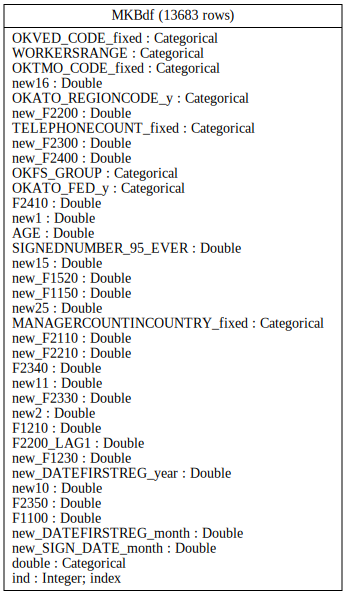

In [ ]:
es.plot()

In [ ]:
primitives = ft.list_primitives()
pd.options.display.max_colwidth = 500
primitives[primitives['type'] == 'aggregation'].head(primitives[primitives['type'] == 'aggregation'].shape[0])

,name,type,dask_compatible,koalas_compatible,description,valid_inputs,return_type
0,std,aggregation,True,True,"Computes the dispersion relative to the mean value, ignoring `NaN`.",<ColumnSchema (Semantic Tags = ['numeric'])>,None
1,median,aggregation,False,False,Determines the middlemost number in a list of values.,<ColumnSchema (Semantic Tags = ['numeric'])>,None
2,avg_time_between,aggregation,False,False,Computes the average number of seconds between consecutive events.,<ColumnSchema (Logical Type = Datetime) (Semantic Tags = ['time_index'])>,None
3,percent_true,aggregation,True,False,Determines the percent of `True` values.,"<ColumnSchema (Logical Type = BooleanNullable)>, <ColumnSchema (Logical Type = Boolean)>",None
4,num_unique,aggregation,True,True,"Determines the number of distinct values, ignoring `NaN` values.",<ColumnSchema (Semantic Tags = ['category'])>,None
5,min,aggregation,True,True,"Calculates the smallest value, ignoring `NaN` values.",<ColumnSchema (Semantic Tags = ['numeric'])>,None
6,trend,aggregation,False,False,Calculates the trend of a column over time.,"<ColumnSchema (Logical Type = Datetime) (Semantic Tags = ['time_index'])>, <ColumnSchema (Semantic Tags = ['numeric'])>",None
7,mean,aggregation,True,True,Computes the average for a list of values.,<ColumnSchema (Semantic Tags = ['numeric'])>,None
8,time_since_last,aggregation,False,False,Calculates the time elapsed since the last datetime (default in seconds).,<ColumnSchema (Logical Type = Datetime) (Semantic Tags = ['time_index'])>,None
9,count,aggregation,True,True,"Determines the total number of values, excluding `NaN`.",<ColumnSchema (Semantic Tags = ['index'])>,None


In [ ]:
feature_matrix, feature_defs = ft.dfs(
    entityset=es, 
    trans_primitives = [
        'add_numeric', 
        'multiply_numeric',
        'divide_numeric'
    ]
)

KeyError: ignored